In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('fb_final.csv')

**Data understanding**

In [66]:
df.shape

(587117, 14)

In [67]:
df.head(10)

,id,status,trip_date,booking_month,days,trip_season,commission,decline_cancel_reason,decline_cancel_note,location,country,rating_equipment,rating_captain,rating_overall
0,326039,done,2020-01-01,1,1,Winter,120.00,NaN,NaN,Orlando,United States,5.0,5.0,5.0
1,326040,canceled,2020-03-15,3,1,Spring,399.60,notEnoughPeople,People in the group pulled out,Herradura,Costa Rica,NaN,NaN,NaN
2,326041,canceled,2020-03-18,3,1,Spring,224.00,notEnoughPeople,People in the group pulled out,Herradura,Costa Rica,NaN,NaN,NaN
3,326042,declined,2020-01-04,1,1,Winter,164.24,notEnoughPeople,Captain can’t accomodate capacity,Melbourne,Australia,NaN,NaN,NaN
4,326044,canceled,2020-01-13,1,1,Winter,250.00,other,Personal,Playa Del Carmen,Mexico,NaN,NaN,NaN
5,326045,declined,2020-01-01,1,1,Winter,714.00,captainUnresponsive,Captain unresponsive,San Diego,United States,NaN,NaN,NaN
6,326047,declined,2020-01-01,1,1,Winter,270.00,captainUnresponsive,Captain unresponsive,Bluffton,United States,NaN,NaN,NaN
7,326048,done,2020-01-31,1,1,Winter,280.00,NaN,NaN,Coral Gables,United States,5.0,5.0,5.0
8,326049,declined,2020-01-02,1,1,Winter,480.00,badWeather,Bad weather,Cortez,United States,NaN,NaN,NaN
9,326050,canceled,2020-06-13,6,1,Summer,525.00,other,Personal,San Diego,United States,NaN,NaN,NaN


In [69]:
df.dtypes

id                         int64
status                    object
trip_date                 object
booking_month              int64
days                       int64
trip_season               object
commission               float64
decline_cancel_reason     object
decline_cancel_note       object
location                  object
country                   object
rating_equipment         float64
rating_captain           float64
rating_overall           float64
dtype: object

In [70]:
df.describe()

,id,booking_month,days,commission,rating_equipment,rating_captain,rating_overall
count,5.871170e+05,587117.000000,587117.000000,587117.000000,226419.000000,226419.000000,226419.000000
mean,6.844171e+05,6.609916,1.006144,405.315706,4.806319,4.881958,4.788896
std,2.032373e+05,2.695204,0.097810,278.805843,0.566285,0.511586,0.653977
min,3.260390e+05,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,5.107940e+05,5.000000,1.000000,226.000000,5.000000,5.000000,5.000000
50%,6.853020e+05,7.000000,1.000000,340.000000,5.000000,5.000000,5.000000
75%,8.596290e+05,8.000000,1.000000,500.000000,5.000000,5.000000,5.000000
max,1.036335e+06,12.000000,10.000000,12964.000000,5.000000,5.000000,5.000000


**Data preparation**

In [71]:
df = df[['id', 'status', 'trip_date', 'booking_month', 
    # 'days', 'trip_season',
       'commission', 
    # 'decline_cancel_reason', 'decline_cancel_note',
       'location', 'country'
    #  ,'rating_equipment', 'rating_captain','rating_overall'
        ]].copy()

In [72]:
df.shape

(587117, 7)

In [73]:
df['trip_date'] = pd.to_datetime(df['trip_date'])

In [74]:
df = df.rename(columns={'id':'Booking_ID',
                   'status':'Status',
                   'trip_date':'Trip_Date',
                   'booking_month':'Booking_Month',
                   'commission':'Commission',
                   'location':'Location',
                   'country':'Country'})

In [75]:
df = df.drop(df[(df['Status'] == 'canceled') | (df['Status'] == 'declined')].index)

In [76]:
df.dtypes

Booking_ID                int64
Status                   object
Trip_Date        datetime64[ns]
Booking_Month             int64
Commission              float64
Location                 object
Country                  object
dtype: object

In [77]:
df.isna().sum()

Booking_ID       0
Status           0
Trip_Date        0
Booking_Month    0
Commission       0
Location         0
Country          0
dtype: int64

In [78]:
df.duplicated().sum()

0

In [79]:
df.shape

(382178, 7)

**Plotting**

Text(0, 0.5, 'Bookings')

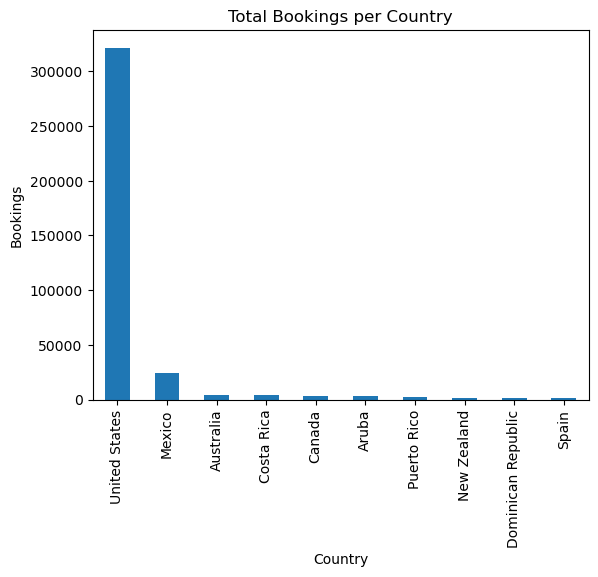

In [80]:
ax = df['Country'].value_counts().head(10).plot(kind = 'bar', title = 'Total Bookings per Country')
ax.set_xlabel('Country')
ax.set_ylabel('Bookings')